# Goal of the Notebook: Exploaring the features of Pandas plot function as follows:
1. Simple Graph for a input feature and its interpretation.  
2. Box plot to find outliers. 

### Input: Chennai water level in dams and rainfall in the dam areas 
donwload from Kaggle: https://www.kaggle.com/sudalairajkumar/chennai-water-management
- About data:
    - This dataset has details about the water availability in the four main reservoirs over the last 15 years
        1. Poondi
        2. Cholavaram
        3. Redhills
        4. Chembarambakkam

The data is available on a daily basis and the unit is million cubic feet.

# Creating Pandas dataframe from the input files:

In [1]:
import pandas as pd
print('Current version of Pandas:', pd.__version__)

Current version of Pandas: 0.23.0


In [2]:
def read_files_create_df(filename):
    pdDataFrame = pd.read_csv(filename)
    pdDataFrame['Date'] = pd.to_datetime(pdDataFrame['Date'], dayfirst=True, format="%d-%m-%Y")
    print('Total number of rows:', len(pdDataFrame))
    print('We have columns as:', list(pdDataFrame.columns))
    return pdDataFrame

In [3]:
filename = 'chennai_reservoir_levels.csv'
pdReservoirLevels = read_files_create_df(filename)
filename = 'chennai_reservoir_rainfall.csv'
pdReservoirRainfall = read_files_create_df(filename)

Total number of rows: 5647
We have columns as: ['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']
Total number of rows: 5647
We have columns as: ['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']


In [4]:
# Check 1: if data is not sorted in date wise manner then sort it.
pdReservoirLevels   = pdReservoirLevels.sort_values(['Date'])
pdReservoirRainfall = pdReservoirRainfall.sort_values(['Date'])

# Simple Graph for a input feature and its interpretation:

In [5]:
# Drawing graph to see water level variation in last 15 years:
pdReservoirLevels.set_index('Date').plot(figsize=(14,5))

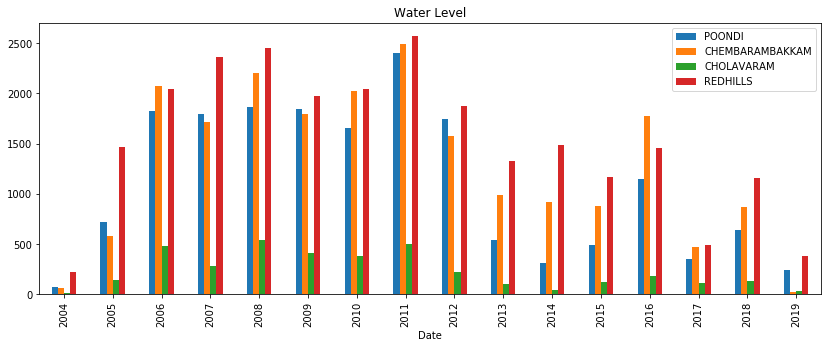

In [6]:
pdReservoirLevels.groupby(pdReservoirLevels['Date'].dt.year).mean()[['POONDI', 'CHEMBARAMBAKKAM', \
                                             'CHOLAVARAM', 'REDHILLS']].plot(figsize=(14,5),\
                                                                             kind = 'bar',\
                                             title = 'Water Level')

### Insights from the graph:
1. Individual dam capacity is different. E.g. Cholavaram dam water level is always small that other 3 dam levels. Indicates this dam's capacity is small than the other 3 dams. 
2. Poondi, Redhills and Chembarambakkam are the main source of water to the city.
3. From 2016 water level is dropping drastically in every dam and its reached to zero for all the dams at the end
4. From 2015 onwards water level in all the dams touched 0 multiple times. This can be due to low rainfall during that time period or uses is increased or both

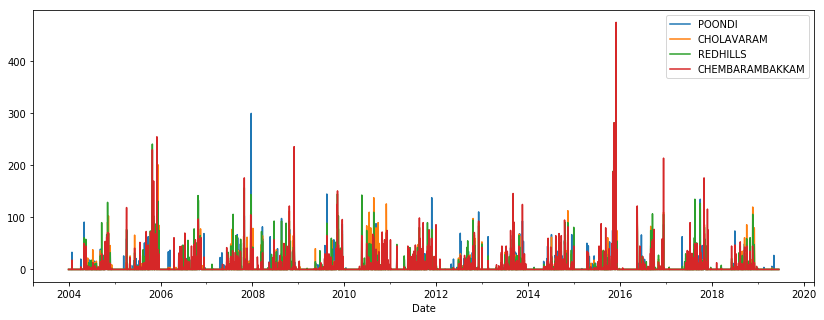

In [7]:
# Drawing graph to see water level variation in last 15 years:
pdReservoirRainfall.set_index('Date').plot(figsize=(14,5))

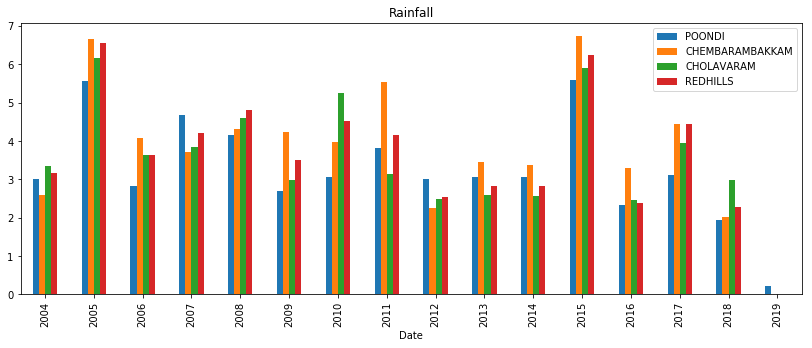

In [8]:
pdReservoirRainfall.groupby(pdReservoirLevels['Date'].dt.year).mean()[['POONDI', 'CHEMBARAMBAKKAM', \
                                             'CHOLAVARAM', 'REDHILLS']].plot(figsize=(14,5),\
                                                                             kind = 'bar',\
                                             title = 'Rainfall')

### Insights from the graph:
1. Maximum Rainfall in all of the dam areas occuring in the second half of the year
2. Rainfall is dropped from 2016 onwards 

# Now we will draw graph for one of the dam for Water level and rainfall:

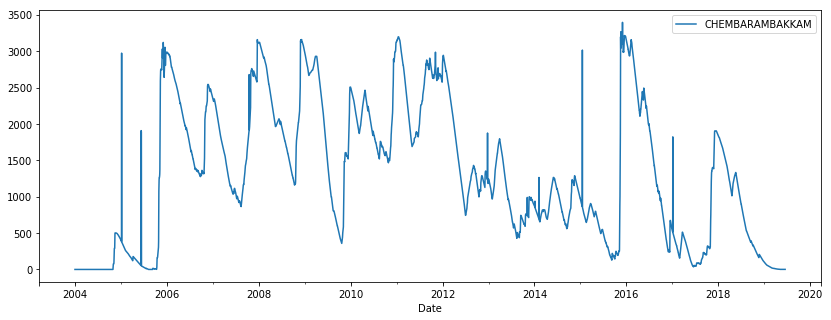

In [9]:
pdReservoirLevels.set_index('Date')[['CHEMBARAMBAKKAM']].plot(figsize=(14,5))

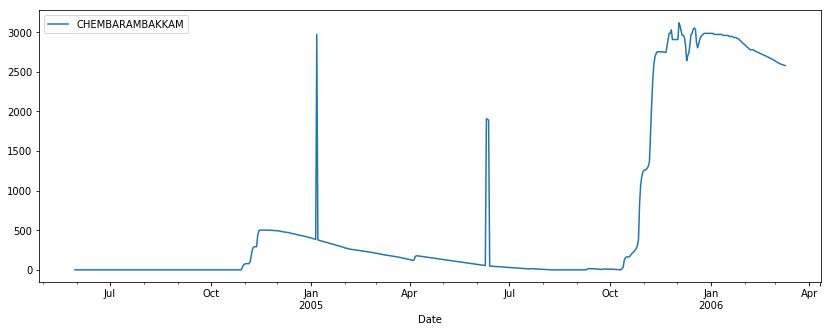

In [10]:
# Now we can see the spike in the starting of 2015 lets zoom in the graph to see what its:
pdReservoirLevels[150:800].set_index('Date')[['CHEMBARAMBAKKAM']].plot(figsize=(14,5))

#### One possible reason can be becuase the dam are may have recieve heavy rain fall in thatime perido e.g. from Dec 2015 to Jan 2015 and in June 2015 to July 2015. Lets verify it

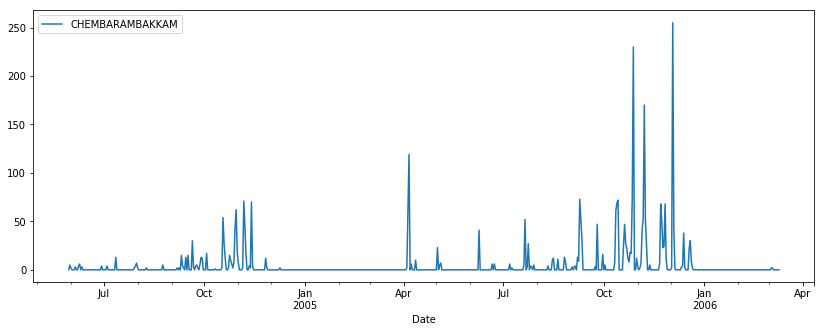

In [11]:
pdReservoirRainfall[150:800].set_index('Date')[['CHEMBARAMBAKKAM']].plot(figsize=(14,5))

### But the rainfall in taht period is zero. This can be outier or wrong information. But if data is correct then it will needs further invetigation. e.g. if dam is getting water from other sources too other than rain i.e. from river etc.
- Lets see for the Poondi dam 

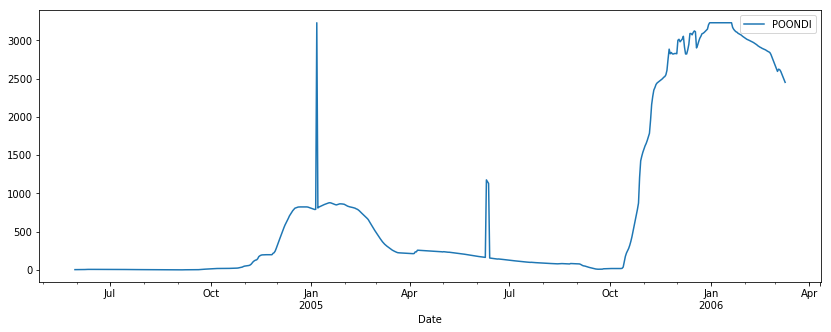

In [12]:
pdReservoirLevels[150:800].set_index('Date')[['POONDI']].plot(figsize=(14,5))
# Poonding dam is also showing the same spike

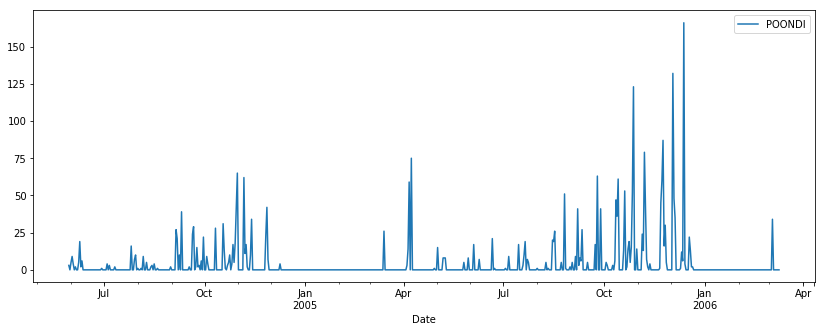

In [13]:
pdReservoirRainfall[150:800].set_index('Date')[['POONDI']].plot(figsize=(14,5))

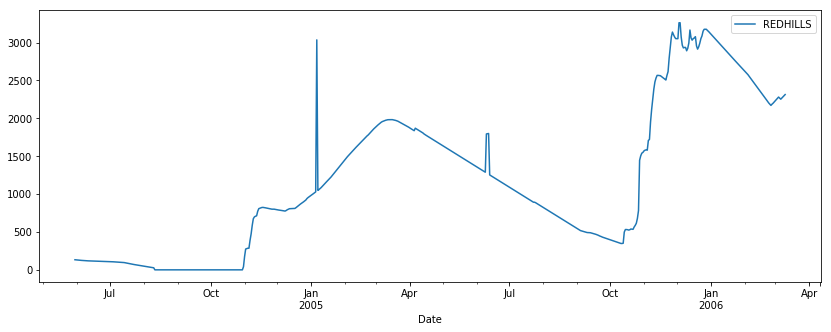

In [14]:
pdReservoirLevels[150:800].set_index('Date')[['REDHILLS']].plot(figsize=(14,5))
# REDHILLS dam is also showing the same spike

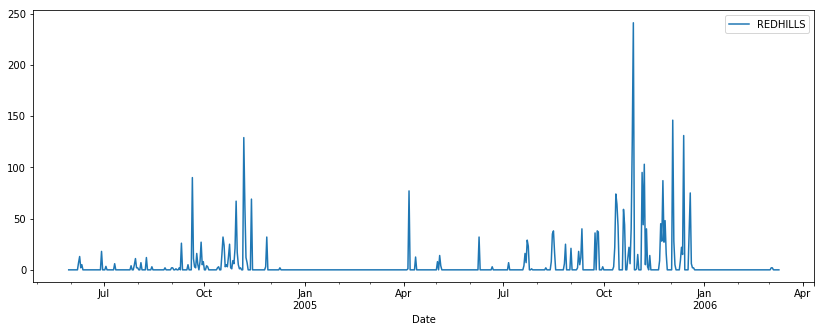

In [15]:
pdReservoirRainfall[150:800].set_index('Date')[['REDHILLS']].plot(figsize=(14,5))

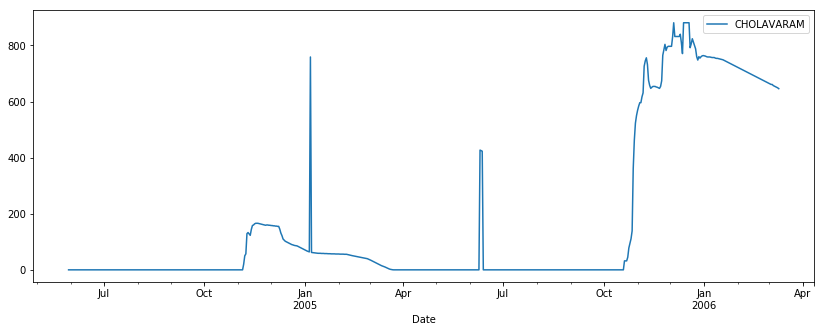

In [16]:
pdReservoirLevels[150:800].set_index('Date')[['CHOLAVARAM']].plot(figsize=(14,5))
# REDHILLS dam is also showing the same spike

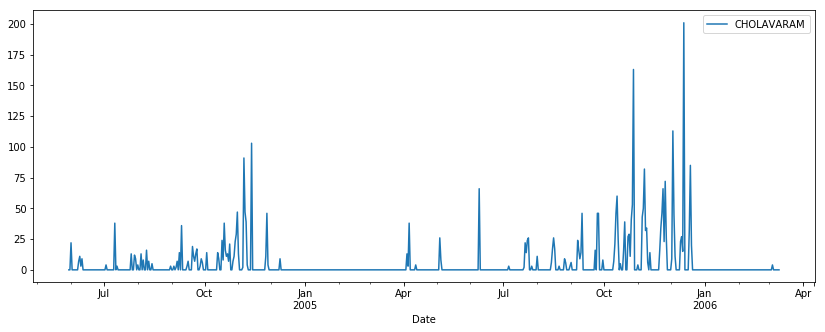

In [17]:
pdReservoirRainfall[150:800].set_index('Date')[['CHOLAVARAM']].plot(figsize=(14,5))

#### But in the Cholavaram dam are we can see there is a rainfall in June month for which we can see the spike in the Water level graph as well.
- Still from the data its not clear why this spikes in Jan and June month can be seen for all of the dams
- other view: since spike is present in the same date range for all the dams and also if we check 2015 (https://en.wikipedia.org/wiki/2015_South_Indian_floods) ther was floods in this year so we can asssume spike is sudden rain fall in that date range

# Box plot:

# Lets try to find out the outliers in each case i.e. in rainfall and for the Water level
#### What is a box and whisker plot?
A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.
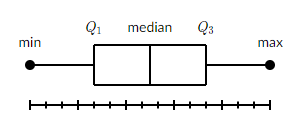

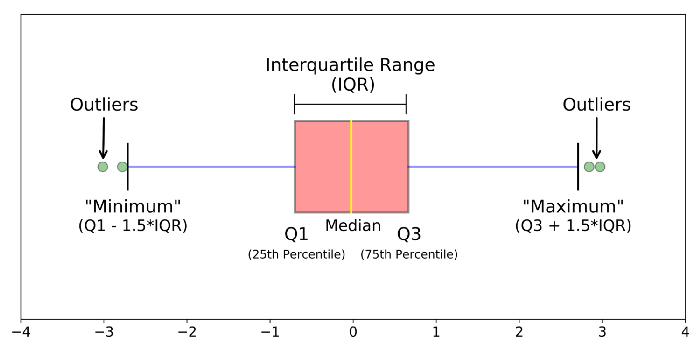

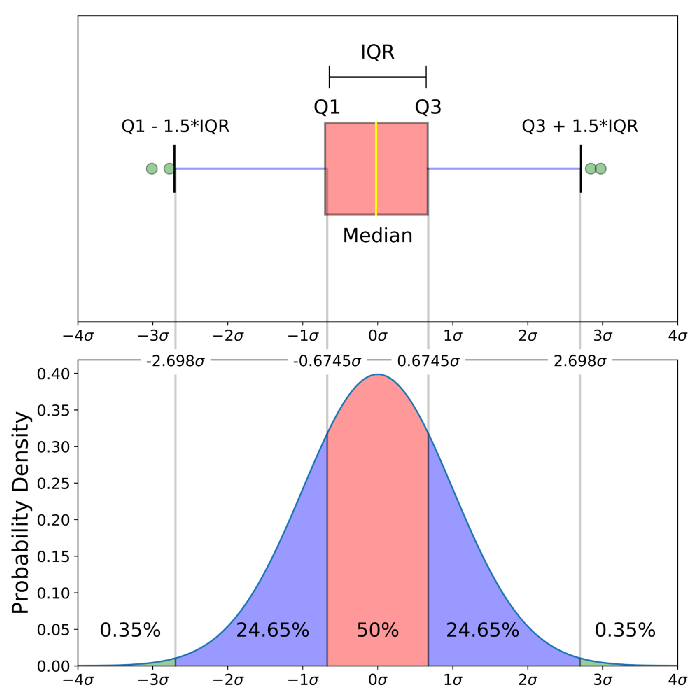

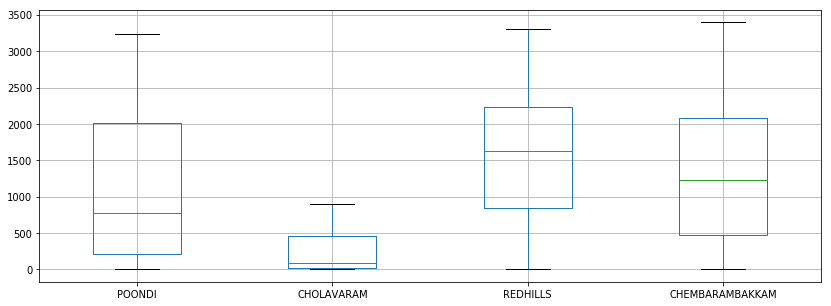

In [18]:
pdReservoirLevels.boxplot(figsize=(14,5))

### Conclusion: In the water level we did not found any outliers (dots)

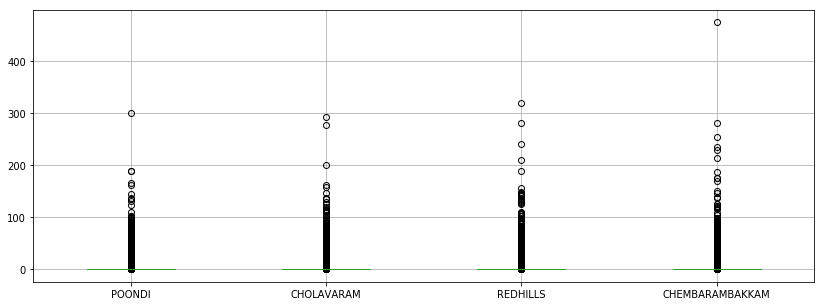

In [19]:
pdReservoirRainfall.boxplot(figsize=(14,5))  # outlier in daily rainfall

#### in daily rainfall we can see mean (green line) is at 0 this is because there are many days where rainfall was 0. Now we will look at yearly average rainfall 

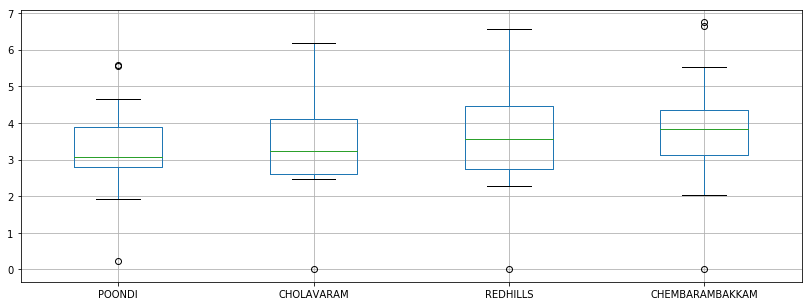

In [20]:
pdReservoirRainfall['Year'] = pdReservoirRainfall['Date'].dt.year
pdReservoirRainfall.groupby(['Year']).mean().boxplot(figsize=(14,5))  # outlier in yearly rainfall
#but 0 cannot be the outlier since its possible value. Now we will look at the Monthwise rainfall

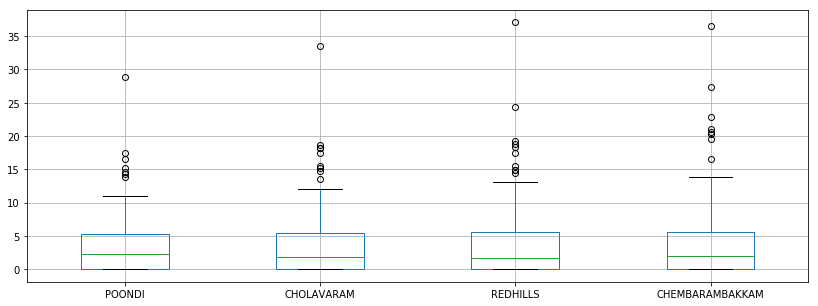

In [21]:
pdReservoirRainfall['Month'] = pdReservoirRainfall['Date'].dt.month
pdReservoirRainfall.groupby(['Year','Month']).mean().boxplot(figsize=(14,5))#outlier in monthly rainfall

### Conclusion: Here we found dots as the outliers in each.

In [22]:
pdReservoirRainfall.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month
count,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000
mean,3.364486,3.617177,3.756862,3.923862,2011.237294,6.427307
std,12.755029,14.078840,15.060551,16.287227,4.468135,3.452166
min,0.000000,0.000000,0.000000,0.000000,2004.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2007.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,2011.000000,6.000000
75%,0.000000,0.000000,0.000000,0.000000,2015.000000,9.000000
max,300.000000,293.000000,320.000000,475.000000,2019.000000,12.000000


In [23]:
pdReservoirRainfall.groupby(['Year','Month']).mean().describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,186.000000,186.000000,186.000000,186.000000
mean,3.344132,3.595789,3.734449,3.904302
std,4.054637,4.812004,5.160938,5.414266
min,0.000000,0.000000,0.000000,0.000000
25%,0.130645,0.000000,0.032527,0.000000
50%,2.280876,1.869892,1.780430,1.951613
75%,5.350806,5.443548,5.544624,5.661290
max,28.923333,33.566667,37.073333,36.600000


- Should we keep them? 
- Answer: Now it depends upon the possible value of the rainfall that can occure in that area. In 2015 there was highest rainfall 483 mm (highest) in the Chennai. 
- by looking at the 2nd graph of rainfall for all the dams we can see except 2015 there is no unusual spikes. 

Still we will use another method to check :

# DBScan Clustering
- is a clustering algorithm that’s used cluster data into groups. It is also used as a density-based anomaly detection method with either single or multi-dimensional data.
- other clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers. 
- Border Points are in the same cluster as core points but much further away from the centre of the cluster.
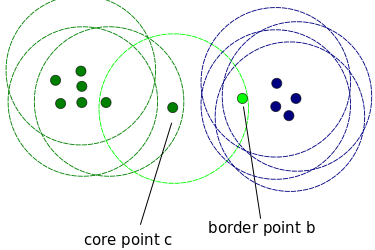
  Source:https://stackoverflow.com/questions/34394641/dbscan-clustering-what-happens-when-border-point-of-one-cluster-is-considered
- Everything else is called Noise Points, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. Now, let’s see some code.

In [24]:
def find_outlier_using_dbscan(Features):
    from sklearn.cluster import DBSCAN
    outlier_detection = DBSCAN(min_samples = 2, eps = 3)
    #min_samples. This is simply the minimum number of core points needed in order to form a cluster.
    #eps is the maximum distance between two samples for them to be considered as in the same cluster.
    clusters = outlier_detection.fit_predict(Features)
    print('Found these many outliers:', list(clusters).count(-1))

In [25]:
find_outlier_using_dbscan(pdReservoirRainfall[['POONDI']])
# found 6 outliers in case of daily rainfall. Assigns -1 to outliers

Found these many outliers: 6


In [26]:
find_outlier_using_dbscan(pdReservoirRainfall.groupby(['Year']).mean()[['POONDI']])
# found 0 outliers in case of yearly rainfall. 

Found these many outliers: 0


In [27]:
find_outlier_using_dbscan(pdReservoirRainfall[['REDHILLS']])
# found 6 outliers. Assigns -1 to outliers

Found these many outliers: 6


In [28]:
find_outlier_using_dbscan(pdReservoirRainfall.groupby(['Year']).mean()[['REDHILLS']])
# found 6 outliers. Assigns -1 to outliers

Found these many outliers: 0


In [29]:
find_outlier_using_dbscan(pdReservoirRainfall[['CHEMBARAMBAKKAM']])
# found 12 outliers. Assigns -1 to outliers

Found these many outliers: 12


In [30]:
find_outlier_using_dbscan(pdReservoirRainfall.groupby(['Year']).mean()[['CHEMBARAMBAKKAM']])
# # found 0 outliers in case of yearly rainfall. 

Found these many outliers: 0


In [31]:
find_outlier_using_dbscan(pdReservoirRainfall[['CHOLAVARAM']])
# found 8 outliers. Assigns -1 to outliers

Found these many outliers: 8


In [32]:
find_outlier_using_dbscan(pdReservoirRainfall.groupby(['Year']).mean()[['CHOLAVARAM']])
# found 0 outliers in case of yearly rainfall. 

Found these many outliers: 0


## In the conclusion we can see we dont find any outlier in the yearly rainfall data and very small numbers in case of daily rainfall. 